# Load/Build NEURON model

In [2]:
# Load NEURON
from neuron import h, gui

In [3]:
# Build cells
soma1 = h.Section(name='soma1')
soma2 = h.Section(name='soma2')

soma1.insert('hh')
soma1.insert('pas')

soma2.insert('hh')
soma2.insert('pas')

# Add some 3D points
h.pt3dadd(-100, 0, 0, 10, sec=soma1)
h.pt3dadd(-110, 0, 0, 10, sec=soma1)

h.pt3dadd(100, 0, 0, 10, sec=soma2)
h.pt3dadd(110, 0, 0, 10, sec=soma2)

1.0

In [4]:
# Add synapses between the cells
syn1 = h.Exp2Syn(0.5, sec=soma1)
syn2 = h.Exp2Syn(0.5, sec=soma2)

syn1.tau2 = syn2.tau2 = 0.1

# The synapses will be reciprocal excitatory
# Triggering a spike in one cell will result in a spike in the second cell
# Which in turn will excite the first cell
# Resulting in an self-excitatory loop
nc1 = h.NetCon(soma2(0.5)._ref_v, syn1, 0, 20, 1, sec=soma2)
nc2 = h.NetCon(soma1(0.5)._ref_v, syn2, 0, 40, 1, sec=soma1)


In [5]:
# Trigger first cell
ns = h.NetStim()
ns.number = 1
ns.start = 10
ns.noise = 0

nc_start = h.NetCon(ns, syn1, 0, 0, 1)

In [6]:
# Record voltage
t = h.Vector()
t.record(h._ref_t)

v1 = h.Vector()
v1.record(soma1(0.5)._ref_v)

v2 = h.Vector()
v2.record(soma2(0.5)._ref_v)

Vector[5]

In [7]:
# Run sim
h.tstop = 150
h.run()

0.0

In [8]:
from matplotlib import pyplot as plt

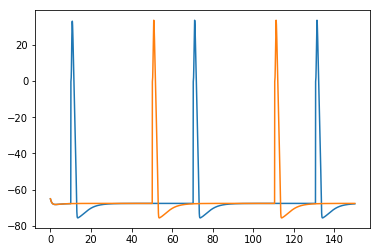

In [9]:
# Plot

plt.plot(t.as_numpy(), v1.as_numpy())
plt.plot(t.as_numpy(), v2.as_numpy())
plt.show()

# Insert LFP electrode

In [10]:
from LFPsimpy import LfpElectrode

In [11]:
le = LfpElectrode(x=0, y=10, z=10, sampling_period=h.dt)

In [12]:
h.run()

0.0

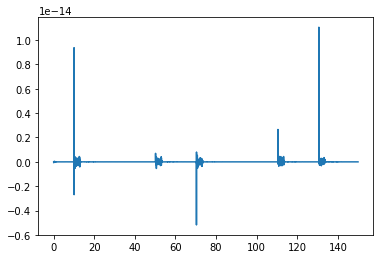

In [13]:
# Plot the LFP signal
plt.plot(le.times, le.values)
plt.show()

# Multiple electrodes

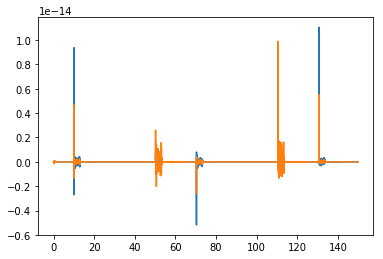

In [14]:
# Insert a second electrode
le2 = LfpElectrode(x=105, y=20, z=20, sampling_period=h.dt)
h.run()

# Plot both
plt.plot(le.times, le.values)
plt.plot(le2.times, le2.values)
plt.show()

# Different estimation methods

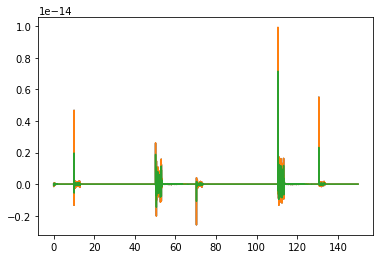

In [15]:
# Insert a third electrode - use 'Point' method (see Parasuram et. al. (2016))
# Default is 'Line' 
le3 = LfpElectrode(x=105, y=20, z=20, sampling_period=h.dt, method='Point')

# Insert a fourth electrode - use 'RC' method
le4 = LfpElectrode(x=105, y=20, z=20, sampling_period=h.dt, method='RC')

h.run()

# Plot all three methods
plt.plot(le2.times, le2.values)
plt.plot(le3.times, le3.values)
plt.plot(le4.times, le4.values)
plt.show()

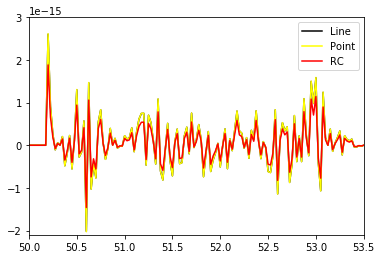

In [16]:
# Close-up
plt.plot(le2.times, le2.values,label='Line', color='black')
plt.plot(le3.times, le3.values,label='Point',color='yellow')
plt.plot(le4.times, le4.values,label='RC',   color='red')
plt.xlim(50,53.5)
plt.ylim(-0.21e-14, 0.3e-14)
plt.legend()
plt.show()

# MPI usage

 - Insert electrodes as above on all ranks
 - Run psolve()
 - Rank 0 contains aggregated electrode .times and .values
 - Other ranks contain only .values from the sections on those ranks